<a href="https://colab.research.google.com/github/emazakaria/Diabetes-Prediction/blob/main/Diabetes_Prediction_(Big_Data_Analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

In [ ]:
! jupyter nbconvert --to html /content/diabetes.ipynb

[NbConvertApp] WARNING | pattern '/content/diabetes.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import the dataset
dataset = pd.read_csv("/content/diabetes.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/diabetes.csv'

In [ ]:
# DATA EXPLORATION
# display the first 5 dataset
dataset.head()

In [ ]:
# Amount of rows and columns in the data
dataset.shape

In [ ]:
# getting overview of columns
dataset.info()

In [ ]:
# summary of dataset
dataset.describe()

# null values are present in the form of zeros
# impossible to have Glucose, BloodPressure, SkinThickness, Insulin, BMI to be zero


# Data Preprocessing

In [ ]:
# DATA PREPROCESSING
# FEATURE EXTRACTION
# reduce the number of features in a dataset by creating new features from the existing ones
# (and then discarding the original features).
# Extracting input(independent) and output(dependent) feature

# iloc() function enables us to select a particular cell of the dataset
X = dataset.iloc[:, :-1].to_numpy()
y = dataset.iloc[:, -1].to_numpy()
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0


Oversampling



In [ ]:
# Handling Class Imbalance Problem using Over Sampling
# randomly resample the training dataset
# to duplicate examples from the minority class, called oversampling
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=0)
X_r, y_r = smk.fit_resample(X, y)

# Check if over sampling worked
from collections import Counter
print(f"Initial counts: {Counter(y)}")
print(f"Resampled Counts: {Counter(y_r)}")

Initial counts: Counter({0: 500, 1: 268})
Resampled Counts: Counter({1: 475, 0: 475})




Removing Duplicates


In [ ]:
# DROP THE DUPLICATES
dataset.shape
dataset = dataset.drop_duplicates()



Removing missing values


In [ ]:
#check for null values
dataset.isnull().sum()

# meaning: there's no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



Replace zero values with NaN


In [ ]:
# null values are present in the form of zeros
# to check the no. of zero values in dataset
print("No. of zero values in Glucose ", dataset[dataset["Glucose"]==0].shape[0])
print("No. of zero values in BloodPressure ", dataset[dataset["BloodPressure"]==0].shape[0])
print("No. of zero values in SkinThickness ", dataset[dataset["SkinThickness"]==0].shape[0])
print("No. of zero values in Insulin ", dataset[dataset["Insulin"]==0].shape[0])
print("No. of zero values in BMI ", dataset[dataset["BMI"]==0].shape[0])

No. of zero values in Glucose  0
No. of zero values in BloodPressure  0
No. of zero values in SkinThickness  0
No. of zero values in Insulin  0
No. of zero values in BMI  0


In [ ]:
# since it's impossible to have Glucose, BloodPressure, SkinThickness, Insulin, BMI to be zero.
# to determine the amount of zero value present in each column
# replace zero values with np.nan to visualize them

zero_not_accepted = ["Glucose", "BloodPressure", "SkinThickness",
                    "Insulin", "BMI"]
for col in zero_not_accepted:
    dataset[col].replace(0, np.nan, inplace=True)

# check if zeros were replaced in required columns
dataset.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1




Imputing with mean, standard deviation, minimum, maximum and quartile of 25%, 50%, 75%.


In [ ]:
# imputing mean instead of null values
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].mean(), inplace=True)

In [ ]:
# imputing std instead of null values
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].std(), inplace=True)

In [ ]:
# imputing minimum instead of null values
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].min(), inplace=True)

In [ ]:
# imputing maximum instead of null values
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].max(), inplace=True)

In [ ]:
# imputing 25% quartile instead of null values
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].quantile(0.25), inplace=True)

In [ ]:
# imputing 50% quartile instead of null values
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].quantile(0.50), inplace=True)

In [ ]:
# imputing 75% quartile instead of null values
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].quantile(0.75), inplace=True)

In [ ]:
dataset.describe()

# new mean of Insulin and SkinThickness has increased drastically

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000





# Count Plot



Negative (0):  500
Positive (1):  268


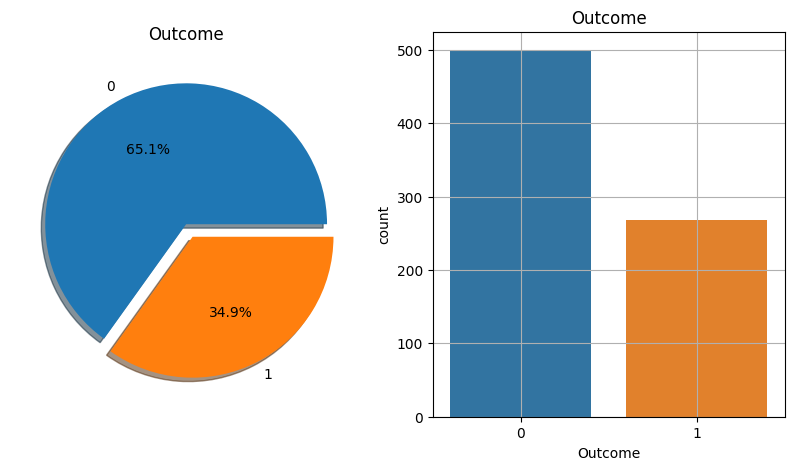

In [ ]:
# count plot
f, ax = plt.subplots(1, 2, figsize=(10, 5))
dataset['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=dataset, ax=ax[1])  # Modified line
ax[1].set_title('Outcome')
N, P = dataset['Outcome'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()
# 0 = False
# 1 = True
# out of 768 people, 268 are diabetec and 500 are not
# this countplot tells us that the dataset is imbalanced

# Histogram

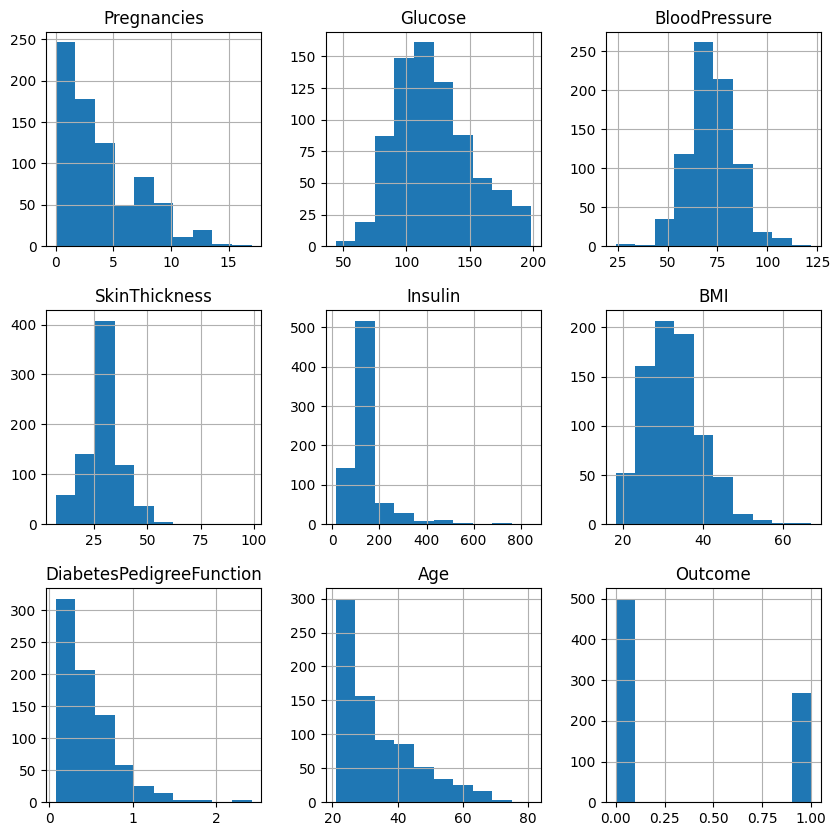

In [ ]:
# histogram
dataset.hist(bins =10, figsize=(10,10))
plt.show()



# Correlation Analysis

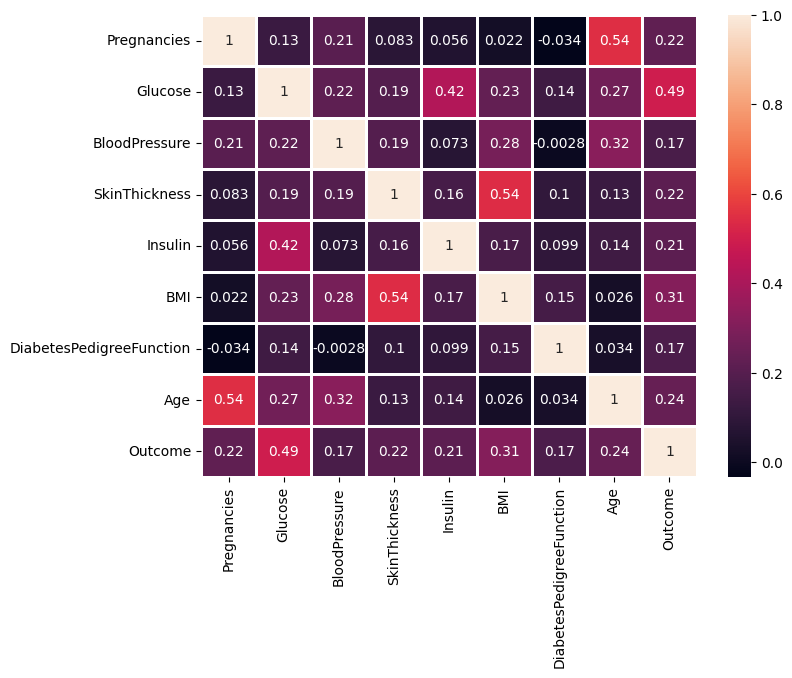

In [ ]:
# Correlation Analysis
# to qualify the degree to which two variables are related
# how much one variables changes when the other one does
# provides linear relationship between 2 variables (dependency)
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, linewidths=2)
plt.show()

#Glucose, BMI, Age, Pregnancies have noticeable positive correlation with Outcome

In [ ]:
# Splitting the Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [ ]:
# FEATURE SCALING
# use Feature Scaling to bring all values to the same magnitudes

# As all the input features are numerical values,
# perform Standardization (Z-score normalization)
# xi=(xi−μi)÷σ
# μ  - mean,  σ  - standard deviation
# re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Notice the mean ~ 0 and std ~ 1 for all the input features
pd.DataFrame(X_train, columns=dataset.columns[:-1]).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-2.748435e-17,0.000000,1.041512e-16,4.628943e-17,3.471707e-17,-3.095606e-15,1.583243e-15,-3.471707e-17
std,1.000815e+00,1.000815,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.126063e+00,-3.803690,-3.543717e+00,-1.285816e+00,-6.996567e-01,-4.072759e+00,-1.166818e+00,-1.048981e+00
25%,-8.354355e-01,-0.688897,-3.699205e-01,-1.285816e+00,-6.996567e-01,-5.951922e-01,-6.862388e-01,-7.991138e-01
50%,-2.541807e-01,-0.106839,1.419821e-01,1.481486e-01,-3.844838e-01,2.444697e-02,-2.927647e-01,-3.826685e-01
75%,6.177016e-01,0.632531,5.515042e-01,7.560247e-01,4.077076e-01,5.776962e-01,4.205946e-01,6.168003e-01
max,3.814603e+00,2.425896,2.701495e+00,4.886465e+00,6.506730e+00,4.412504e+00,5.867657e+00,3.948363e+00




# Classification

In [ ]:
# Training Various Classification models from sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#Helper functions to judge different classifiers

#function to display an exquisite confusion matrix
def disp_cm(y_test, y_pred)->float:
    """Displays the confusion matrix in the form of heatmap.

    Parameters:
    y_test (array-like): list of true labels
    y_pred (array-like): list of predicted labels

    Returns:
    acc_score (float): Accuracy score
    """
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score

#function to generate performance report of a classifer
def judge_clf(classifier, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test)->float:
    """Fits the `classifier` to `X_train`, `y_train` and generate an elegant
    classification report using `X_test` and `y_test`.

    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.
    X_test  (array-like): 2D-array of input features of Testing Set.
    y_test  (array-like): list of target features of Testing Set.

    Returns:
    acc_score (float): Accuracy score
    """
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = disp_cm(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score



# KNearestNeighbours

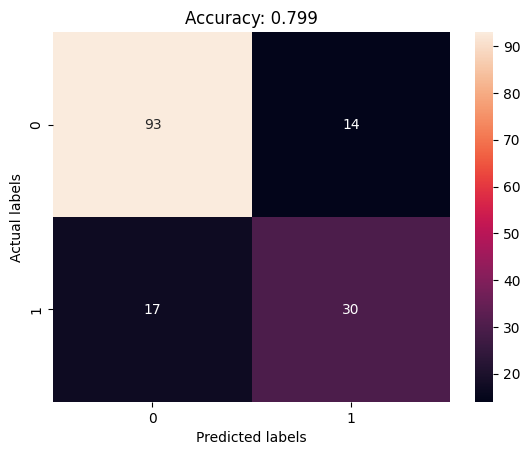

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



In [ ]:
# KNN - KNearestNeighbours
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_acc = judge_clf(knn_clf)




# Naive Bayes

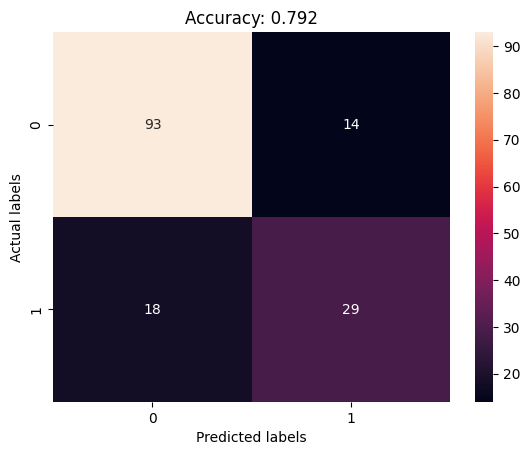

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
naiveb_acc = judge_clf(nb_clf)


# Decision Trees

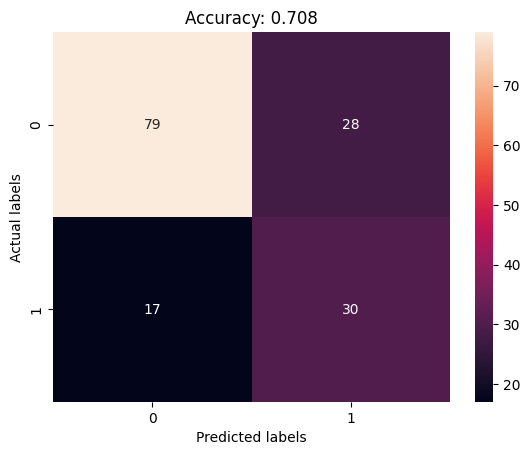

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       107
           1       0.52      0.64      0.57        47

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.73      0.71      0.72       154



In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(criterion="entropy",
                                             random_state=0
                                  )
dtree_acc = judge_clf(dtree_clf)



# Decision Tree Visualization

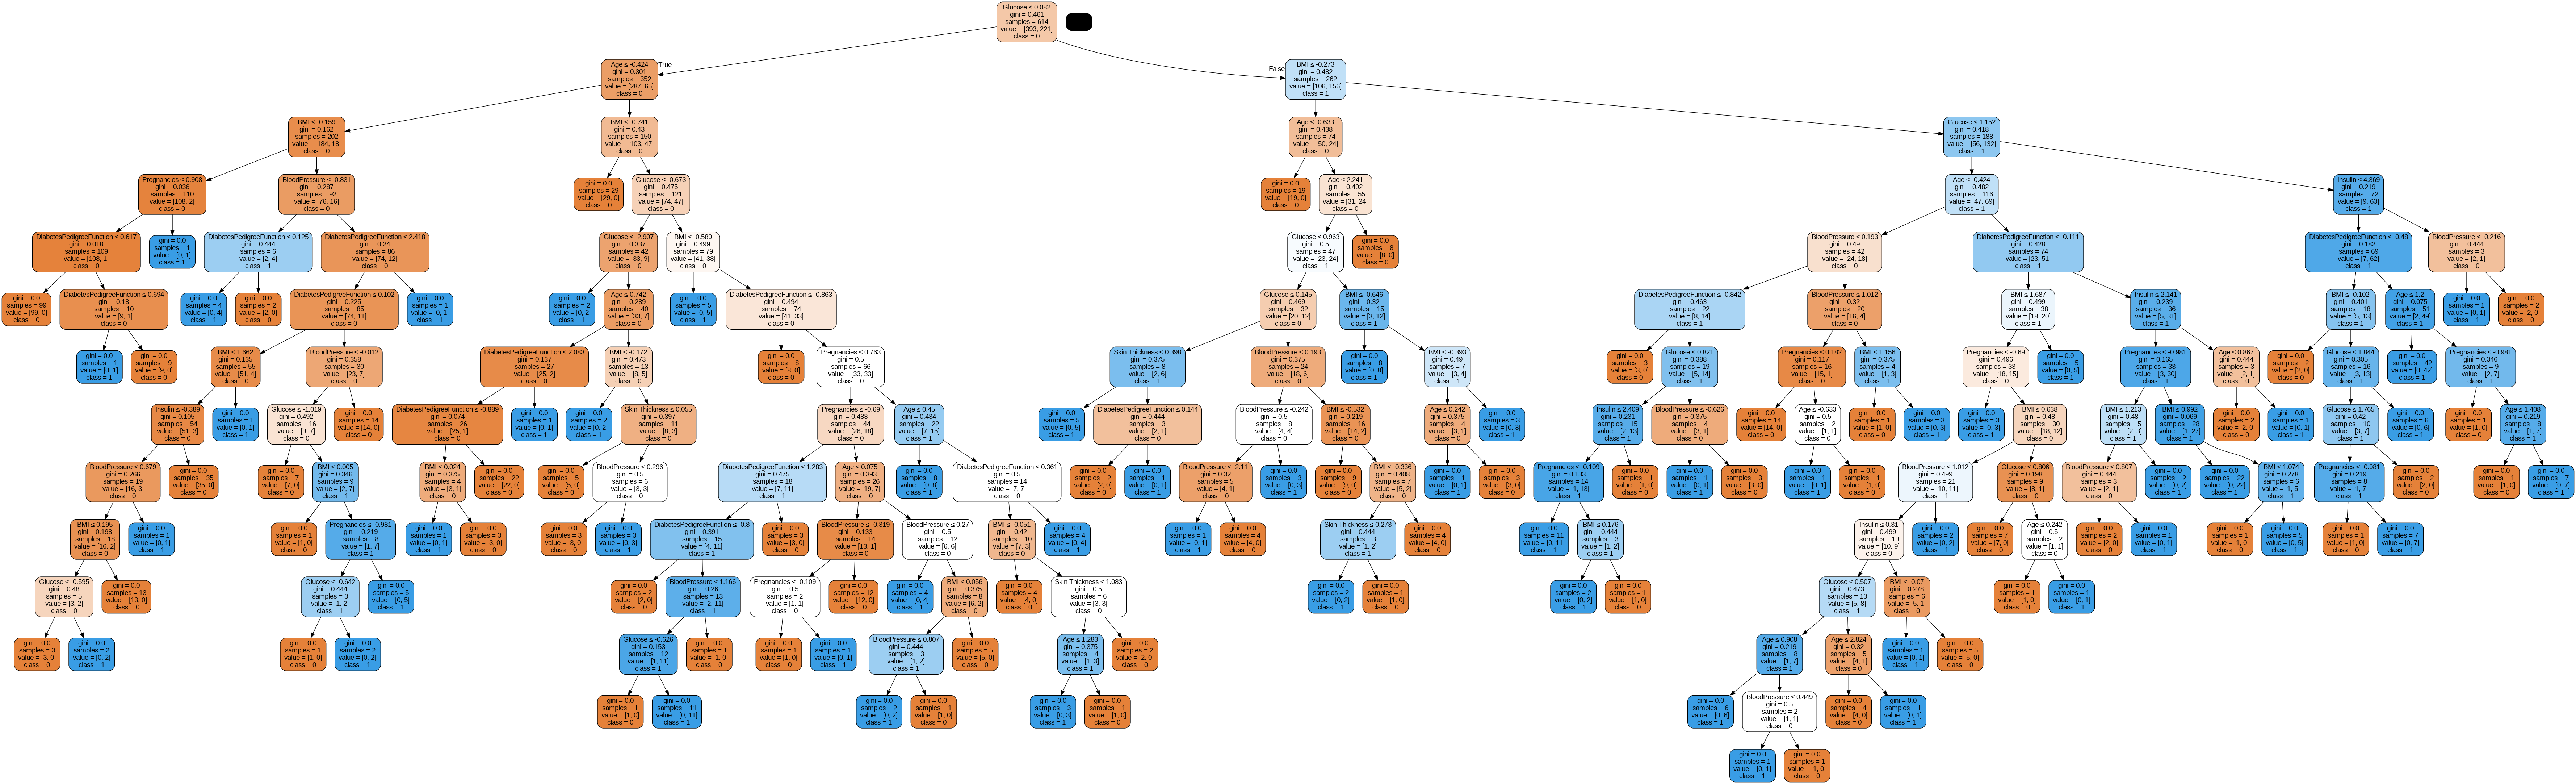

In [ ]:
# !pip install matplotlib-venn
# !pip install six
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

feature_cols = ['Pregnancies', 'Glucose','BloodPressure','Skin Thickness','Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


## Random Forest

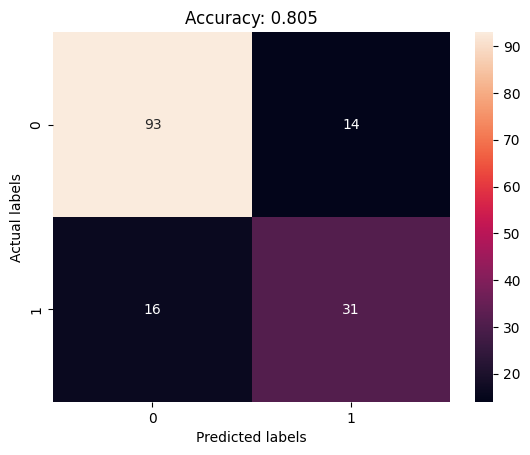

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfor_clf = RandomForestClassifier(n_estimators=100,
                                            criterion="entropy",
                                            random_state=0)
rfor_acc = judge_clf(rfor_clf)

# Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ["KNN", "Naive Bayes", "Decision-Tree", "Random Forest"],
    'Accuracy Score': [knn_acc, naiveb_acc, dtree_acc, rfor_acc]
})

models.sort_values(by = 'Accuracy Score', ascending = False, ignore_index=True)

,Model,Accuracy Score
0,Random Forest,0.805195
1,KNN,0.798701
2,Naive Bayes,0.792208
3,Decision-Tree,0.707792
